In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
%matplotlib inline

df = pd.read_csv("stroopdata.csv")

**1. What is our independent variable? What is our dependent variable?**

Independent variable: Congruency/incongruency of word text and word color.

Dependent variable: The time it takes to identify word color as opposed to word text. 

**2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.** 

Null Hypothsis, $H_{0}$: The incongruency of word color and word text has either (1) no demonstrable effect on the time it takes to identify word color or (2) decreases the time it takes to identify word color(compared to congruency of word color and word text).

Alternate Hypothesis, $H_{1}$: The incongruency of word color and word text increases the time it takes to identify word color (compared to congruency of word color and word text).

$H_{0}$: $μ_{i}$ ≤ $μ_{c}$ 

$H_{1}$: $μ_{i}$ > $μ_{c}$ 

where: 

$μ_{c}$ = population mean of congruent values

$μ_{i}$ = population mean of incongruent values

Statistic test choice: paired, one-tailed t-test 

A t-test is better than a z-test in this case, because we do not know the standard deviation of the population, just the standard deviation of the sample. Moreover, we have a sample size smaller than 30, so we cannot assume normality. The t-test is paired because the same participants perform under two different conditions (congruence vs. incongruence). The goal is therefore to determine whether the mean difference between the two conditions deviates significantly from zero.

We set $\alpha = .05 $ to determine statistical significance.


**3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [2]:
print(df)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Sample size = 24

Mean:

    Congruent: 14.05
    
    Incogruent: 22.02

Median: 

    Congruent: 14.36
    
    Incongruent: 21.02

Sample standard deviation: 

    Congruent: 3.56
    
    Incongruent: 4.80


**4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

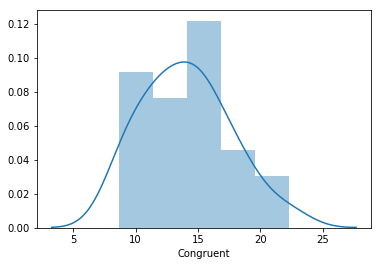

In [4]:
sns.distplot(df['Congruent'])

The data plot reflects a normal distribution. The mean and median are both around 15. 

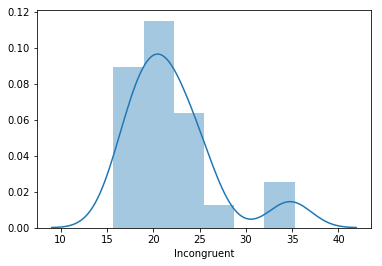

In [5]:
sns.distplot(df['Incongruent'])

The data plot is mostly normally distributed, but there are some data points on the right. Due to this skew right, median may be a better measure of central tendency than mean. 

**5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [6]:
diff = df['Congruent'] - df['Incongruent']
n = len(df)
degrees_of_freedom = n - 1
confidence_interval = 0.95

In [7]:
def null_hypothesis():
    t_statistic = (abs(np.mean(df['Congruent']) - np.mean(df['Incongruent']))) / (diff.std()/np.sqrt(n))
    critical_val = t.ppf(confidence_interval, degrees_of_freedom)
    if t_statistic > critical_val:
        print('Reject null hypothesis')
    else: 
        print('Fail to reject null hypothesis')
    print('T-statistic: {}'.format(round(t_statistic, 3)))
    print('Critical value: {}'.format(round(critical_val, 3)))

In [8]:
null_hypothesis()

Reject null hypothesis
T-statistic: 8.021
Critical value: 1.714


The t-statistic (8.021) is much greater than the critical value (1.714), so we reject the null hypothesis. Therefore, we can conclude that incongruency between word color and word text does in fact increase the time it takes to identify word color over word text.